In [1]:
import numpy as np
import pandas as pd


In [4]:
data=pd.read_csv("C:/Users/priti/Downloads/heart.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
import seaborn as sns

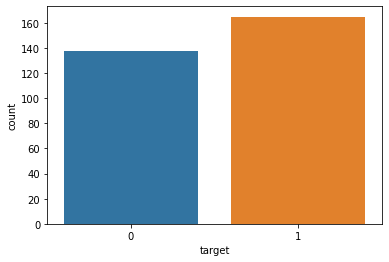

In [7]:
sns.countplot(data.target)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data['age'].nunique()

41

C:\Users\priti\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


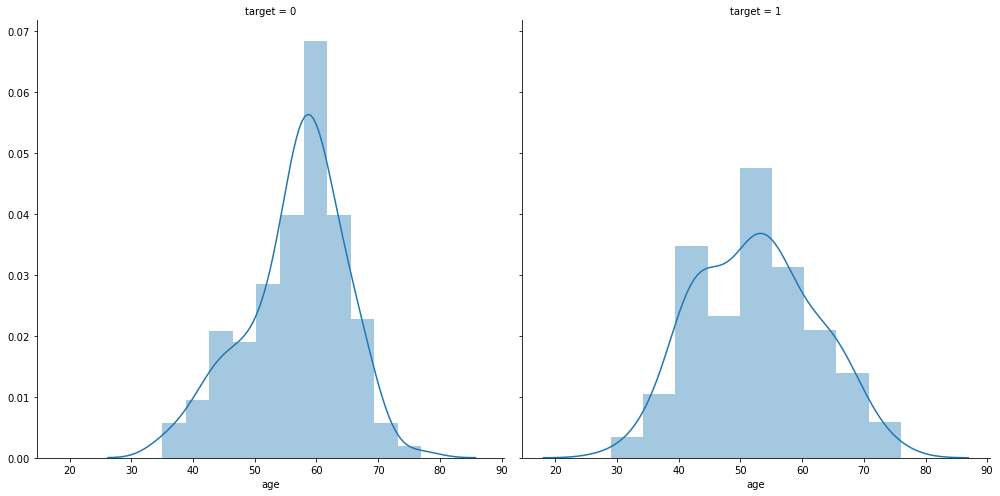

In [12]:
age_visual = sns.FacetGrid(data, col = 'target', size=7)
age_visual = age_visual.map(sns.distplot, "age")


In [13]:
import matplotlib.pyplot as plt

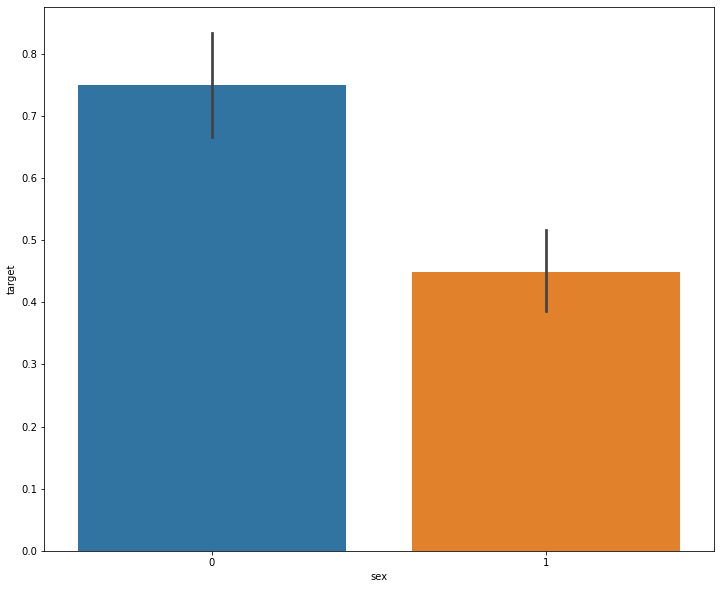

In [16]:
plt.figure(figsize=(12,10))
sns.barplot(x='sex',y='target',data=data)

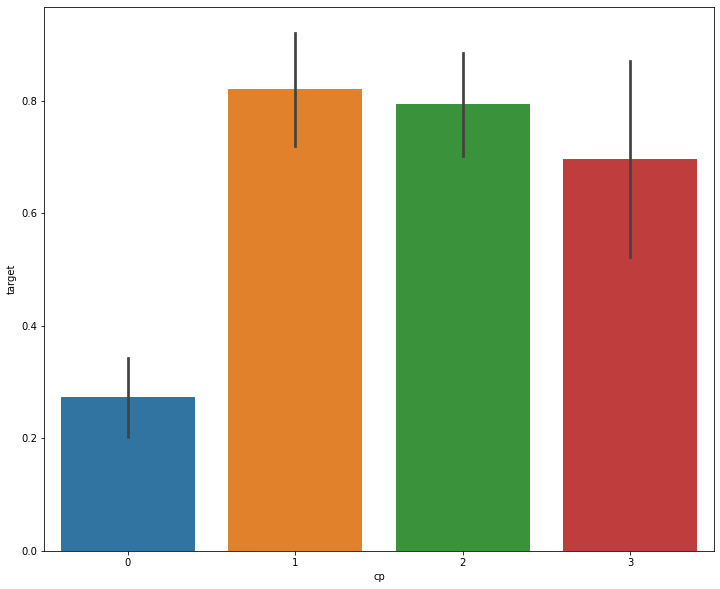

In [17]:
plt.figure(figsize=(12,10))
sns.barplot(x='cp',y='target',data=data)

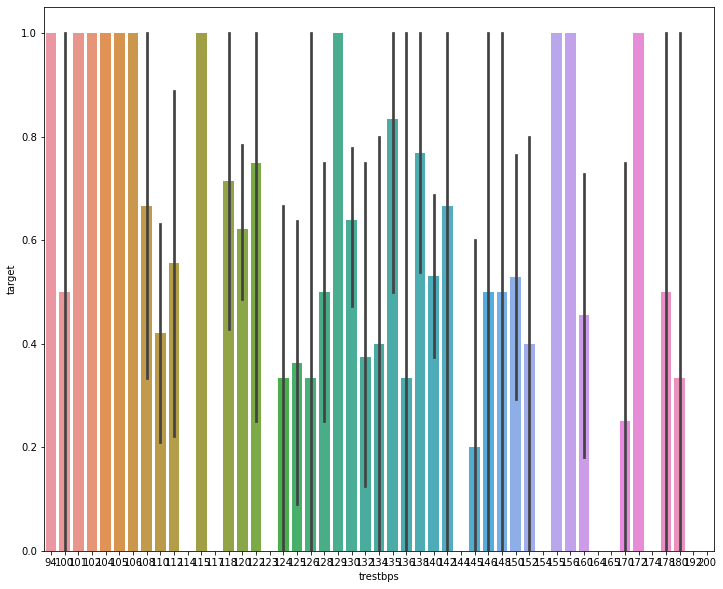

In [19]:
plt.figure(figsize=(12,10))
sns.barplot(x='trestbps',y='target',data=data)

In [30]:
y= data['target']
x=data.drop('target',axis=1)

In [31]:
y.head()

2    1
3    1
4    1
5    1
6    1
Name: target, dtype: int64

In [32]:

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [20]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,17,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(xtrain, ytrain)
y_pred = rf_classifier_rs.predict(xtest)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = confusion_matrix(ytest, y_pred)

print(cm)

[[29 12]
 [ 4 46]]


In [38]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, rf_classifier_rs.predict(xtest)))
print (classification_report(ytest, rf_classifier_rs.predict(xtest)))

Accuracy : 0.82418 


              precision    recall  f1-score   support

           0       0.88      0.71      0.78        41
           1       0.79      0.92      0.85        50

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.83      0.82      0.82        91



In [39]:
from sklearn.linear_model import LogisticRegression
parameters = {'max_iter':[100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(xtrain, ytrain)
y_pred = lr_classifier_rs.predict(xtest)

C:\Users\priti\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\priti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\priti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

In [40]:
cm = confusion_matrix(ytest, y_pred)

print(cm)

[[30 11]
 [ 2 48]]


In [41]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, lr_classifier_rs.predict(xtest)))
print (classification_report(ytest, lr_classifier_rs.predict(xtest)))

Accuracy : 0.85714 


              precision    recall  f1-score   support

           0       0.94      0.73      0.82        41
           1       0.81      0.96      0.88        50

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.87      0.86      0.85        91

